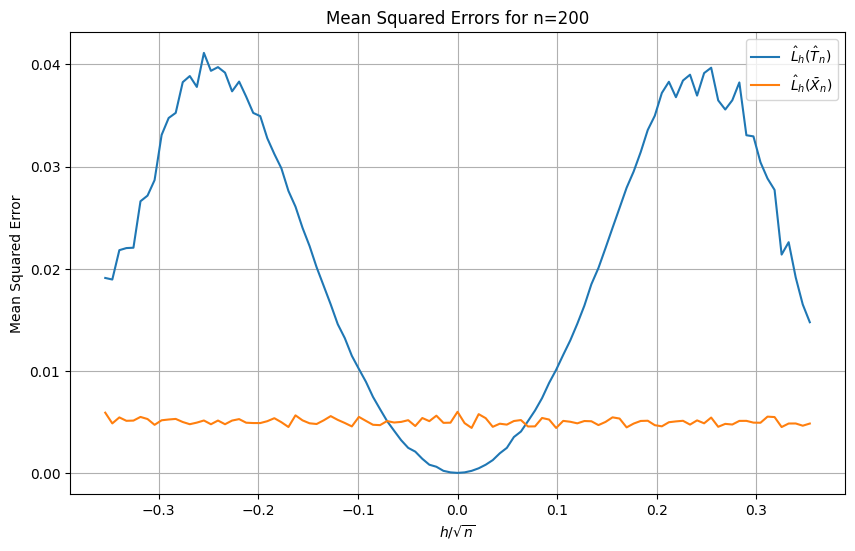

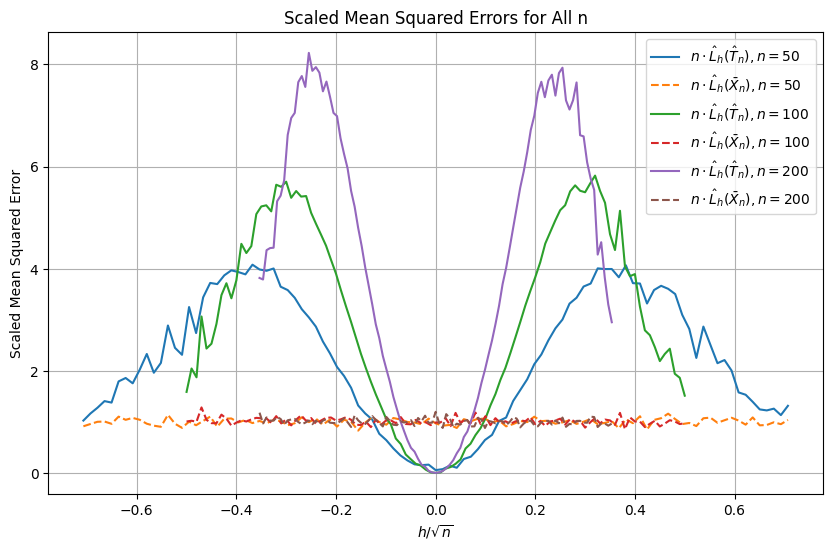

In [10]:
import numpy as np
import matplotlib.pyplot as plt

n_values = [50, 100, 200]
h_values = np.arange(-5.0, 5.1, 0.1) 
N = 500 
results = {}

for n in n_values:
    mse_Tn = [] 
    mse_Xn = []  
    threshold = n ** (-1 / 4)

    for h in h_values:
        theta_h = h / np.sqrt(n)
        errors_Tn = []
        errors_Xn = []

        for _ in range(N):
            X = np.random.normal(theta_h, 1, n)
            bar_Xn = np.mean(X)

            T_n = bar_Xn if abs(bar_Xn) >= threshold else 0

            errors_Tn.append((T_n - theta_h) ** 2)
            errors_Xn.append((bar_Xn - theta_h) ** 2)

        mse_Tn.append(np.mean(errors_Tn))
        mse_Xn.append(np.mean(errors_Xn))

    results[n] = {
        "h": h_values / np.sqrt(n),
        "mse_Tn": mse_Tn,
        "mse_Xn": mse_Xn,
    }

n = 200

plt.figure(figsize=(10, 6))
plt.plot(results[n]["h"], results[n]["mse_Tn"], label=r"$\hat{L}_h(\hat{T}_n)$")
plt.plot(results[n]["h"], results[n]["mse_Xn"], label=r"$\hat{L}_h(\bar{X}_n)$")
plt.xlabel(r"$h / \sqrt{n}$")
plt.ylabel("Mean Squared Error")
plt.title(f"Mean Squared Errors for n={n}")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
for n in n_values:
    plt.plot(
        results[n]["h"],
        np.array(results[n]["mse_Tn"]) * n,
        label=r"$n \cdot \hat{{L}}_h(\hat{{T}}_n)"+f", n={n}$",
    )
    plt.plot(
        results[n]["h"],
        np.array(results[n]["mse_Xn"]) * n,
        label=r"$n \cdot \hat{{L}}_h(\bar{{X}}_n)"+f", n={n}$",
        linestyle="dashed",
    )

plt.xlabel(r"$h / \sqrt{n}$")
plt.ylabel("Scaled Mean Squared Error")
plt.title("Scaled Mean Squared Errors for All n")
plt.legend()
plt.grid()
plt.show()
